# Make Moons Example

In [1]:
# import packages
%matplotlib inline
import nnet
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
def plot_data_set(X, y, axes):
    plt.figure("Make Moon Data")
    plt.plot(X[0, :][y[0,:]==0], X[1, :][y[0,:]==0], "rs")
    plt.plot(X[0, :][y[0,:]==1], X[1, :][y[0,:]==1], "bo")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.show()


def plot_prediction(X, y, y_pred, axes):
    plt.figure("Predicted Results vs Real")
    plt.plot(X[0, :][y[0,:]==0], X[1, :][y[0,:]==0], "rs")
    plt.plot(X[0, :][y[0,:]==1], X[1, :][y[0,:]==1], "bo")
    plt.plot(X[0, :][y_pred[0,:] == 0], X[1, :][y_pred[0,:] == 0], "rx")
    plt.plot(X[0, :][y_pred[0,:] == 1], X[1, :][y_pred[0,:] == 1], "b+")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.show()
    
    
def plot_cost(costs):
    # Make an agg figure
    fig, ax = plt.subplots()
    ax.plot(costs)
    ax.set_title('Loss Over Epochs')
    fig.canvas.draw()
    # Grab the pixel buffer and dump it into a numpy array
    X = np.array(fig.canvas.renderer._renderer)
    # Now display the array X as an Axes in a new figure
    plt.show()

(2, 670)
(1, 670)


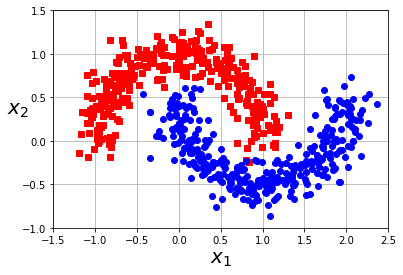

In [3]:
X, y = make_moons(n_samples=1000, noise=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.T
X_test = X_test.T
y_train = np.reshape(y_train, (1, y_train.shape[0]))
y_test = np.reshape(y_test, (1, y_test.shape[0]))
print(X_train.shape)
print(y_train.shape)
plot_data_set(X_train, y_train, [-1.5, 2.5, -1, 1.5])

In [7]:
# Creating the optimizer, regularization, and loss function 
optimizer = nnet.GradientDescent(learning_rate=0.01)
regulizer = nnet.L2Regularization(lamda=0.1)
loss_func = nnet.CrossEntropyLoss()
# Creating new neural network
newNet = nnet.Net(regularization=regulizer, optimizer=optimizer, cost_function=loss_func)
# Adding input placeholder, which have the basic shape of the features of the input data
input = newNet.input_placeholder(shape=(2, None))
# Just showing all activations
hidden1 = newNet.dense(input, numOfUnits=15, activation=nnet.Sigmoid())
hidden2 = newNet.dense(hidden1, numOfUnits=10, activation=nnet.Sigmoid())
hidden3 = newNet.dense(hidden2, numOfUnits=8, activation=nnet.Sigmoid())
hidden4 = newNet.dense(hidden3, numOfUnits=5, activation=nnet.Sigmoid())
output = newNet.dense(hidden4, numOfUnits=1, activation=nnet.Sigmoid())

In [8]:
num_epochs = 25000

costs = []
# Training for num_epochs
for epoch in range(num_epochs):
    _, loss = newNet.train(X_train, y_train)
    costs.append(loss)
    if( epoch % 50 == 0):
        print("------ Epoch: ", epoch, " ------")
        print("Corss entropy Loss: ", loss)
        print("----------------------------")

------ Epoch:  0  ------
Corss entropy Loss:  0.6943177393004358
----------------------------
------ Epoch:  50  ------
Corss entropy Loss:  0.6929332833822998
----------------------------
------ Epoch:  100  ------
Corss entropy Loss:  0.6922416609843207
----------------------------
------ Epoch:  150  ------
Corss entropy Loss:  0.6918927156493482
----------------------------
------ Epoch:  200  ------
Corss entropy Loss:  0.6917106500232333
----------------------------
------ Epoch:  250  ------
Corss entropy Loss:  0.6916079466228187
----------------------------
------ Epoch:  300  ------
Corss entropy Loss:  0.6915415669334306
----------------------------
------ Epoch:  350  ------
Corss entropy Loss:  0.6914907536898006
----------------------------
------ Epoch:  400  ------
Corss entropy Loss:  0.6914458157844887
----------------------------
------ Epoch:  450  ------
Corss entropy Loss:  0.6914024831242336
----------------------------
------ Epoch:  500  ------
Corss entropy Lo

------ Epoch:  4300  ------
Corss entropy Loss:  0.6889258750717625
----------------------------
------ Epoch:  4350  ------
Corss entropy Loss:  0.688865551232469
----------------------------
------ Epoch:  4400  ------
Corss entropy Loss:  0.688802343397673
----------------------------
------ Epoch:  4450  ------
Corss entropy Loss:  0.6887361449429101
----------------------------
------ Epoch:  4500  ------
Corss entropy Loss:  0.6886668513697025
----------------------------
------ Epoch:  4550  ------
Corss entropy Loss:  0.6885943607266402
----------------------------
------ Epoch:  4600  ------
Corss entropy Loss:  0.6885185740390374
----------------------------
------ Epoch:  4650  ------
Corss entropy Loss:  0.6884393957454705
----------------------------
------ Epoch:  4700  ------
Corss entropy Loss:  0.6883567341394423
----------------------------
------ Epoch:  4750  ------
Corss entropy Loss:  0.6882705018143594
----------------------------
------ Epoch:  4800  ------
Cors

------ Epoch:  8600  ------
Corss entropy Loss:  0.6757033379861097
----------------------------
------ Epoch:  8650  ------
Corss entropy Loss:  0.6756096401113075
----------------------------
------ Epoch:  8700  ------
Corss entropy Loss:  0.6755200916952672
----------------------------
------ Epoch:  8750  ------
Corss entropy Loss:  0.6754347200386458
----------------------------
------ Epoch:  8800  ------
Corss entropy Loss:  0.675353573831041
----------------------------
------ Epoch:  8850  ------
Corss entropy Loss:  0.6752767280158383
----------------------------
------ Epoch:  8900  ------
Corss entropy Loss:  0.6752042888379853
----------------------------
------ Epoch:  8950  ------
Corss entropy Loss:  0.6751363989108946
----------------------------
------ Epoch:  9000  ------
Corss entropy Loss:  0.6750732420694634
----------------------------
------ Epoch:  9050  ------
Corss entropy Loss:  0.6750150476924325
----------------------------
------ Epoch:  9100  ------
Cor

------ Epoch:  12900  ------
Corss entropy Loss:  3.7320058202159916
----------------------------
------ Epoch:  12950  ------
Corss entropy Loss:  4.219415002265537
----------------------------
------ Epoch:  13000  ------
Corss entropy Loss:  4.6573607705748445
----------------------------
------ Epoch:  13050  ------
Corss entropy Loss:  4.905385204285808
----------------------------
------ Epoch:  13100  ------
Corss entropy Loss:  5.446165981227335
----------------------------
------ Epoch:  13150  ------
Corss entropy Loss:  6.7401783494820116
----------------------------
------ Epoch:  13200  ------
Corss entropy Loss:  21.43362594555085
----------------------------
------ Epoch:  13250  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  13300  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  13350  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  13400  ------
Corss entropy Loss:  nan
---------------

------ Epoch:  17850  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  17900  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  17950  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  18000  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  18050  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  18100  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  18150  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  18200  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  18250  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  18300  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  18350  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  18400  ------
Corss entropy Loss:  nan
----------------------------
----

------ Epoch:  22800  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  22850  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  22900  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  22950  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  23000  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  23050  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  23100  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  23150  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  23200  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  23250  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  23300  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  23350  ------
Corss entropy Loss:  nan
----------------------------
----

(1, 330)
(1, 330)
Incorrect Predictions:  [0.83172491 0.02715064]
F1 score:  0.9935897435897436


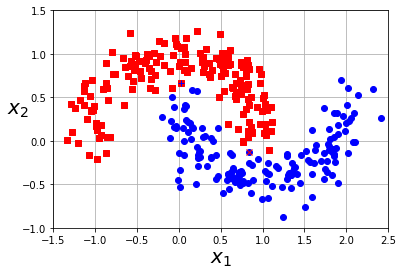

In [6]:
# Predict using trained neural net
pred_y = newNet.predict(X_test)
print(pred_y.shape)

# If Prediction is over .5 then class 1
pred_y[pred_y >= .5] = 1
pred_y[pred_y < .5] = 0
print(y_test.shape)
print("Incorrect Predictions: ", X_test[0, y_test[0,:] != pred_y[0,:]])
print("F1 score: ", f1_score(y_test[0,:], pred_y[0,:]))
plot_prediction(X_test, y_test, pred_y, [-1.5, 2.5, -1, 1.5])

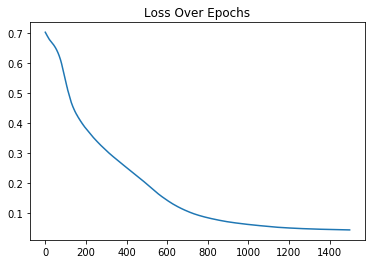

In [7]:
plot_cost(costs)

# Make Classification

In [23]:
X, y = make_classification(n_samples=1000, n_features=3, n_redundant=0, n_informative=3,
                           random_state=42, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.T
X_test = X_test.T
y_train = np.reshape(y_train, (1, y_train.shape[0]))
y_test = np.reshape(y_test, (1, y_test.shape[0]))
print(X_train.shape)
print(y_train.shape)

(3, 670)
(1, 670)


In [24]:
# Creating the optimizer, regularization, and loss function 
optimizer = nnet.GradientDescent(learning_rate=0.01)
regulizer = nnet.L2Regularization(lamda=0.1)
loss_func = nnet.CrossEntropyLoss()
# Creating new neural network
newNet = nnet.Net(regularization=regulizer, optimizer=optimizer, cost_function=loss_func)
# Adding input placeholder, which have the basic shape of the features of the input data
input = newNet.input_placeholder(shape=(3, None))
# Just showing all activations
hidden1 = newNet.dense(input, numOfUnits=15, activation=nnet.Relu())
hidden2 = newNet.dense(hidden1, numOfUnits=10, activation=nnet.Relu())
hidden3 = newNet.dense(hidden2, numOfUnits=8, activation=nnet.Relu())
hidden4 = newNet.dense(hidden3, numOfUnits=5, activation=nnet.Relu())
output = newNet.dense(hidden4, numOfUnits=1, activation=nnet.Sigmoid())

In [25]:
num_epochs = 1500

costs = []
# Training for num_epochs
for epoch in range(num_epochs):
    _, loss = newNet.train(X_train, y_train)
    costs.append(loss)
    if( epoch % 50 == 0):
        print("------ Epoch: ", epoch, " ------")
        print("Corss entropy Loss: ", loss)
        print("----------------------------")

------ Epoch:  0  ------
Corss entropy Loss:  0.8491917897893206
----------------------------
------ Epoch:  50  ------
Corss entropy Loss:  0.6798712856839072
----------------------------
------ Epoch:  100  ------
Corss entropy Loss:  0.6089327836608913
----------------------------
------ Epoch:  150  ------
Corss entropy Loss:  0.5425679512281009
----------------------------
------ Epoch:  200  ------
Corss entropy Loss:  0.4827193797453503
----------------------------
------ Epoch:  250  ------
Corss entropy Loss:  0.4322865003601479
----------------------------
------ Epoch:  300  ------
Corss entropy Loss:  0.39626742200493104
----------------------------
------ Epoch:  350  ------
Corss entropy Loss:  0.3702362194328926
----------------------------
------ Epoch:  400  ------
Corss entropy Loss:  0.3495732225224199
----------------------------
------ Epoch:  450  ------
Corss entropy Loss:  0.3323427870697805
----------------------------
------ Epoch:  500  ------
Corss entropy L

------ Epoch:  4350  ------
Corss entropy Loss:  0.1239847030084341
----------------------------
------ Epoch:  4400  ------
Corss entropy Loss:  0.12342563642380677
----------------------------
------ Epoch:  4450  ------
Corss entropy Loss:  0.12289881591685543
----------------------------
------ Epoch:  4500  ------
Corss entropy Loss:  0.12237625993931649
----------------------------
------ Epoch:  4550  ------
Corss entropy Loss:  0.12185744373298964
----------------------------
------ Epoch:  4600  ------
Corss entropy Loss:  0.12138885310303385
----------------------------
------ Epoch:  4650  ------
Corss entropy Loss:  0.12090584061614547
----------------------------
------ Epoch:  4700  ------
Corss entropy Loss:  0.12041991514240266
----------------------------
------ Epoch:  4750  ------
Corss entropy Loss:  0.119958034531467
----------------------------
------ Epoch:  4800  ------
Corss entropy Loss:  0.11951152951057767
----------------------------
------ Epoch:  4850  --

------ Epoch:  8550  ------
Corss entropy Loss:  0.10692017696674891
----------------------------
------ Epoch:  8600  ------
Corss entropy Loss:  0.10742293433664746
----------------------------
------ Epoch:  8650  ------
Corss entropy Loss:  0.1081200784394557
----------------------------
------ Epoch:  8700  ------
Corss entropy Loss:  0.10890107414329522
----------------------------
------ Epoch:  8750  ------
Corss entropy Loss:  0.10947916627212047
----------------------------
------ Epoch:  8800  ------
Corss entropy Loss:  0.10984398842837985
----------------------------
------ Epoch:  8850  ------
Corss entropy Loss:  0.10889706864826419
----------------------------
------ Epoch:  8900  ------
Corss entropy Loss:  0.10876693851268666
----------------------------
------ Epoch:  8950  ------
Corss entropy Loss:  0.10807317391605112
----------------------------
------ Epoch:  9000  ------
Corss entropy Loss:  0.10785296931492815
----------------------------
------ Epoch:  9050  

------ Epoch:  12750  ------
Corss entropy Loss:  0.7347471103771486
----------------------------
------ Epoch:  12800  ------
Corss entropy Loss:  0.7258295498957832
----------------------------
------ Epoch:  12850  ------
Corss entropy Loss:  0.7187746272842015
----------------------------
------ Epoch:  12900  ------
Corss entropy Loss:  0.7132120358293434
----------------------------
------ Epoch:  12950  ------
Corss entropy Loss:  0.7088378771147092
----------------------------
------ Epoch:  13000  ------
Corss entropy Loss:  0.7054055855565352
----------------------------
------ Epoch:  13050  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  13100  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  13150  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  13200  ------
Corss entropy Loss:  nan
----------------------------
------ Epoch:  13250  ------
Corss entropy Loss:  nan
--------------------------

In [11]:
# Predict using trained neural net
pred_y = newNet.predict(X_test)
print(pred_y.shape)

# If Prediction is over .5 then class 1
pred_y[pred_y >= .5] = 1
pred_y[pred_y < .5] = 0
print(y_test.shape)
print("Incorrect Predictions: ", X_test[0, y_test[0,:] != pred_y[0,:]])
print("F1 score: ", f1_score(y_test[0,:], pred_y[0,:]))

(1, 330)
(1, 330)
Incorrect Predictions:  [ 0.32648806 -1.08785307 -1.54332475 -0.69167715 -0.16855671 -1.61889688
 -1.10964927  0.19353338 -1.28404428 -1.08311824 -0.78526344 -1.15566478
  0.05254361 -0.37444832]
F1 score:  0.9573170731707317


# Regression, California Housing Data

Doesn't seem to work, MSE loss function and Linear activation seem to be creating a horizontal linear function....need time to think about this 

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_log_error, mean_squared_error


housing_data = fetch_california_housing()
X, y = housing_data.data,housing_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = X_train.T
X_test = X_test.T
y_train = np.reshape(y_train, (1, y_train.shape[0]))
y_test = np.reshape(y_test, (1, y_test.shape[0]))
print(X_train.shape)
print(X_train[:,0])
idx = np.random.randint(1000)
X_prediction_check = X_train[:, idx: idx+3]
y_prediction_check = y_train[:, idx: idx+3]

(8, 14448)
[ 4.13120000e+00  3.50000000e+01  5.88235294e+00  9.75490196e-01
  1.21800000e+03  2.98529412e+00  3.39300000e+01 -1.18020000e+02]


In [3]:
optimizer = nnet.GradientDescent(learning_rate=0.001)
regulizer = nnet.L2Regularization(lamda=0)
loss_func = nnet.MeanSquaredError()

newNet = nnet.Net(regularization=regulizer, optimizer=optimizer, cost_function=loss_func)

input = newNet.input_placeholder(shape=(8, None))
# Just showing all activations
hidden1 = newNet.dense(input, numOfUnits=10, activation=nnet.Relu(), initilization="he")
hidden2 = newNet.dense(hidden1, numOfUnits=8, activation=nnet.Relu(), initilization="he")
hidden3 = newNet.dense(hidden2, numOfUnits=5, activation=nnet.Relu(), initilization="mod_he")
hidden4 = newNet.dense(hidden3, numOfUnits=3, activation=nnet.Sigmoid(), initilization=None)
output = newNet.dense(hidden4, numOfUnits=1, activation=nnet.Linear(), initilization=None)

In [4]:
num_epochs = 500

costs = []

for epoch in range(num_epochs):
    _, loss = newNet.train(X_train, y_train)
    costs.append(loss)
    if( epoch % 10 == 0):
        predict_checking = newNet.predict(X_prediction_check)
        print("Predicted Result: ", predict_checking, " Predicted Shape: ", predict_checking.shape)
        print("Real Value: ", y_prediction_check)
        print("------ Epoch: ", epoch, " ------")
        print("MSE: ", loss)
        print("----------------------------")

Predicted Result:  [[-0.09942321 -0.09942321 -0.09942321]]  Predicted Shape:  (1, 3)
Real Value:  [[2.34  1.101 0.904]]
------ Epoch:  0  ------
MSE:  3.0592242452909204
----------------------------
Predicted Result:  [[0.06787331 0.06787331 0.06787331]]  Predicted Shape:  (1, 3)
Real Value:  [[2.34  1.101 0.904]]
------ Epoch:  10  ------
MSE:  2.70495393466626
----------------------------
Predicted Result:  [[0.22227031 0.22227031 0.22227031]]  Predicted Shape:  (1, 3)
Real Value:  [[2.34  1.101 0.904]]
------ Epoch:  20  ------
MSE:  2.403212719291757
----------------------------
Predicted Result:  [[0.36476404 0.36476404 0.36476404]]  Predicted Shape:  (1, 3)
Real Value:  [[2.34  1.101 0.904]]
------ Epoch:  30  ------
MSE:  2.1461989849840153
----------------------------
Predicted Result:  [[0.49627244 0.49627244 0.49627244]]  Predicted Shape:  (1, 3)
Real Value:  [[2.34  1.101 0.904]]
------ Epoch:  40  ------
MSE:  1.92727899562342
----------------------------
Predicted Result: 

Predicted Result:  [[1.99515231 1.99515231 1.99515231]]  Predicted Shape:  (1, 3)
Real Value:  [[2.34  1.101 0.904]]
------ Epoch:  420  ------
MSE:  0.6729658963543405
----------------------------
Predicted Result:  [[2.00089387 2.00089387 2.00089387]]  Predicted Shape:  (1, 3)
Real Value:  [[2.34  1.101 0.904]]
------ Epoch:  430  ------
MSE:  0.6725499254025104
----------------------------
Predicted Result:  [[2.0061924 2.0061924 2.0061924]]  Predicted Shape:  (1, 3)
Real Value:  [[2.34  1.101 0.904]]
------ Epoch:  440  ------
MSE:  0.6721957709311103
----------------------------
Predicted Result:  [[2.01108208 2.01108208 2.01108208]]  Predicted Shape:  (1, 3)
Real Value:  [[2.34  1.101 0.904]]
------ Epoch:  450  ------
MSE:  0.6718942535860903
----------------------------
Predicted Result:  [[2.01559447 2.01559447 2.01559447]]  Predicted Shape:  (1, 3)
Real Value:  [[2.34  1.101 0.904]]
------ Epoch:  460  ------
MSE:  0.6716375565440634
----------------------------
Predicted Res

Shape Of Predictions: 	 (1, 6192)
Mean Squared Log Error: 	 0.1287745182274736
Mean Squared Error: 	 1.3137670434463384


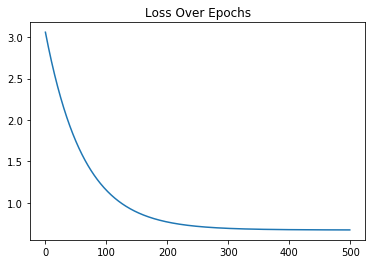

In [5]:
pred_y = newNet.predict(X_test)
print("Shape Of Predictions: \t", pred_y.shape)
print("Mean Squared Log Error: \t", mean_squared_log_error(y_test, pred_y))
print("Mean Squared Error: \t", mean_squared_error(y_test, pred_y))


# make an agg figure
fig, ax = plt.subplots()
ax.plot(costs)
ax.set_title('Loss Over Epochs')
fig.canvas.draw()
# grab the pixel buffer and dump it into a numpy array
X = np.array(fig.canvas.renderer._renderer)

# now display the array X as an Axes in a new figure
plt.show()